<a href="https://colab.research.google.com/github/Geeth-Rath/A-ML/blob/main/mini_project_on_clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

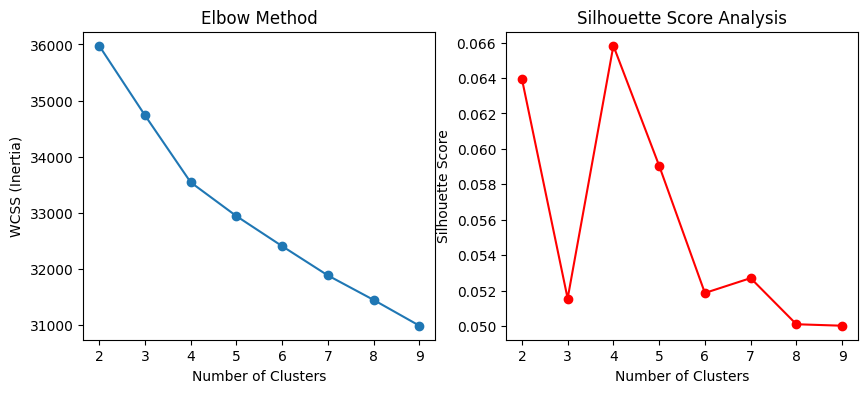

Davies-Bouldin Index: 3.5457
Clustering completed! Output saved to patient_clusters.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("test_v1.csv")

# Drop patient_id for clustering (store separately for final output)
patient_ids = df["patient_id"]
df = df.drop(columns=["patient_id"])

# Handling Missing Values
imputer = SimpleImputer(strategy="median")
df[df.select_dtypes(include=np.number).columns] = imputer.fit_transform(df.select_dtypes(include=np.number))

# Encode Categorical Variables
label_encoders = {}
categorical_columns = ["gender", "chest_pain_type", "exercise_angina", "residence_type", "smoking_status"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string in case of NaNs
    label_encoders[col] = le  # Store encoders for reference

# Normalize Numerical Features
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

# Determine Optimal Number of Clusters
wcss = []
silhouette_scores = []

for k in range(2, 10):  # Trying k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df)

    wcss.append(kmeans.inertia_)  # Within-cluster sum of squares
    silhouette_scores.append(silhouette_score(df, cluster_labels))

# Plot Elbow Method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method")

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, marker='o', color='r')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()

# Choosing Optimal k (Adjust based on the plots)
optimal_k = 5  # Modify based on your Elbow/Silhouette score analysis

# Apply K-Means Clustering
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["cluster_label"] = final_kmeans.fit_predict(df)

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(df.drop(columns=["cluster_label"]), df["cluster_label"])
print(f"Davies-Bouldin Index: {db_index:.4f}")

# Prepare Submission File
submission = pd.DataFrame({
    "patient_id": patient_ids,
    "cluster_label": df["cluster_label"]
})

submission.to_csv("Submission.csv", index=False)
print("Clustering completed! Output saved to patient_clusters.csv")